First 5 Rows:
   Age  Heart Rate  Systolic Blood Pressure  Diastolic Blood Pressure  SpO2  \
0   69         102                      122                        95    95   
1   32          65                      167                        78    99   
2   89         106                      113                        68    95   
3   78          64                      162                        66    92   
4   38         102                      164                        89    94   

   Temperature  Respiratory_Disorder  
0         38.1                     0  
1         37.4                     0  
2         37.7                     0  
3         38.0                     0  
4         37.4                     1   

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  

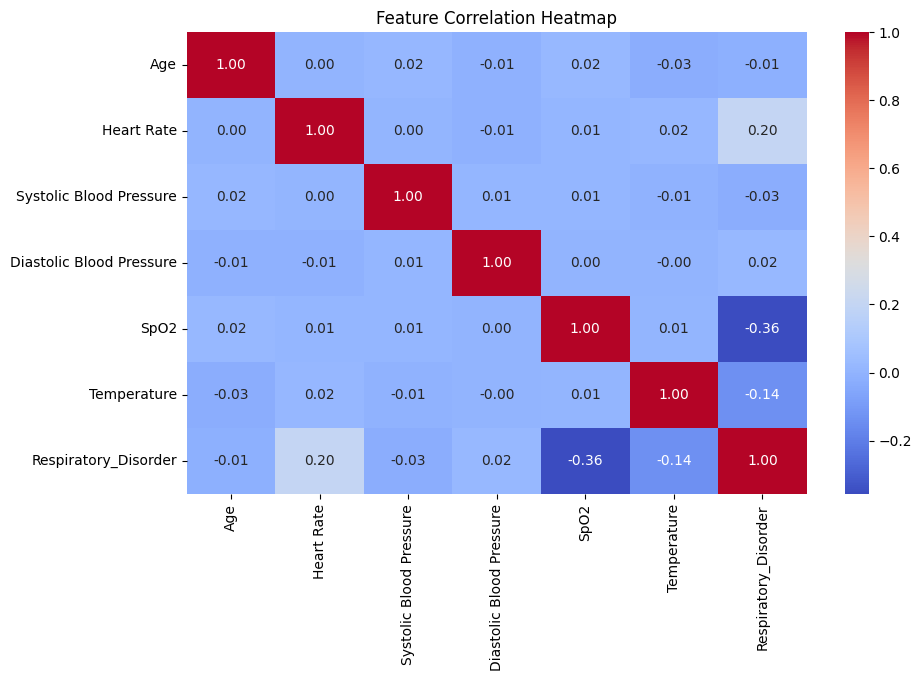

C:\Users\python main\AppData\Local\Temp\ipykernel_10924\3027693816.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Respiratory_Disorder", data=df, palette="coolwarm")


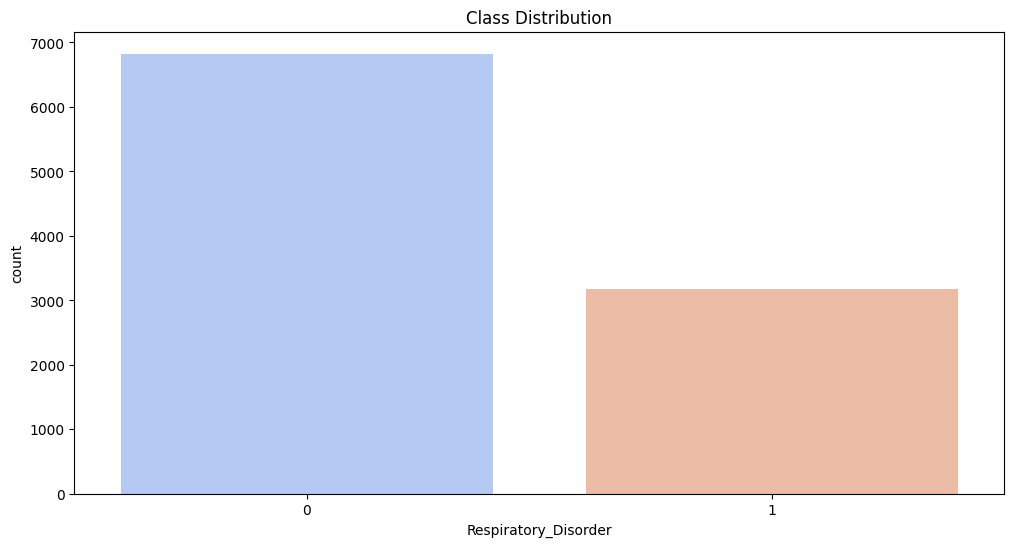


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1387
           1       0.92      0.86      0.89       613

    accuracy                           0.94      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.94      0.93      2000

Accuracy Score: 0.935


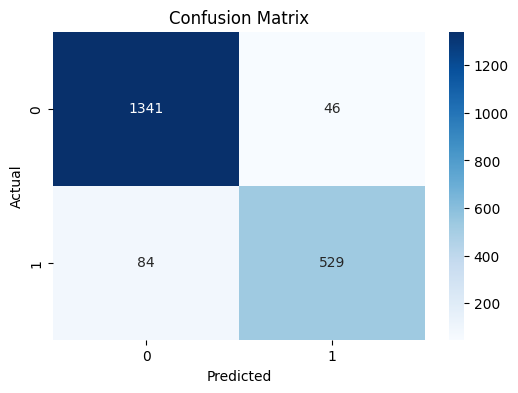

✅ Model and Scaler saved successfully as .pkl files

🔍 Prediction for new data: Normal


C:\Users\python main\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# ==========================================
# Respiratory Disorder Prediction using Random Forest
# ==========================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Step 2: Load Dataset
df = pd.read_csv("respiratory_dataset.csv")

# Step 3: Data Overview
print("First 5 Rows:")
print(df.head(), "\n")

print("Data Info:")
print(df.info(), "\n")

print("Null Values:")
print(df.isnull().sum(), "\n")

# Step 4: Data Visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x="Respiratory_Disorder", data=df, palette="coolwarm")
plt.title("Class Distribution")
plt.show()

# Step 5: Split Features and Target
X = df.drop("Respiratory_Disorder", axis=1)
y = df["Respiratory_Disorder"]

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

# Step 9: Predictions
y_pred = rf.predict(X_test_scaled)

# Step 10: Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Save Model and Scaler
with open("respiratory_rf_model.pkl", "wb") as model_file:
    pickle.dump(rf, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Model and Scaler saved successfully as .pkl files")

# Step 12: Load Model and Predict a Single Value
# Example new patient data
# Age, Heart Rate, Systolic BP, Diastolic BP, SpO2, Temperature
new_data = np.array([[45, 90, 130, 85, 93, 37.8]])

# Load saved model and scaler
with open("respiratory_rf_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Preprocess new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predict
prediction = loaded_model.predict(new_data_scaled)
print("\n🔍 Prediction for new data:", "Respiratory Disorder" if prediction[0] == 1 else "Normal")


In [3]:
import pickle
import numpy as np
new_data = np.array([[45, 90, 130, 85, 93, 37.8]])

# Load saved model and scaler
with open("respiratory_rf_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Preprocess new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predict
prediction = loaded_model.predict(new_data_scaled)
print("\n🔍 Prediction for new data:", "Respiratory Disorder" if prediction[0] == 1 else "Normal")


🔍 Prediction for new data: Normal


C:\Users\python main\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
